### Dataframe de ejemplo para gráfica de barras horizontales

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np

# Semilla para reproducibilidad
np.random.seed(42)

# Simular nombres de entidades federativas
entidades = [
    "Ciudad de México", "Estado de México", "Jalisco", "Nuevo León", "Puebla",
    "Veracruz", "Guanajuato", "Chiapas", "Michoacán", "Tamaulipas",
    "Sonora", "Coahuila", "Durango", "Oaxaca", "Guerrero"
]

# Simular número de víctimas con una distribución creíble
numero_victimas = np.random.randint(50, 1000, size=len(entidades))

# Crear DataFrame simulado
victimas_long= pd.DataFrame({
    "Entidad Federativa": entidades,
    "Numero de Víctimas": numero_victimas
})

victimas_long

,Entidad Federativa,Numero de Víctimas
0,Ciudad de México,152
1,Estado de México,485
2,Jalisco,910
3,Nuevo León,320
4,Puebla,156
5,Veracruz,121
6,Guanajuato,750
7,Chiapas,70
8,Michoacán,664
9,Tamaulipas,171


### **Código a copiar para gráfica de barras horizontales:**

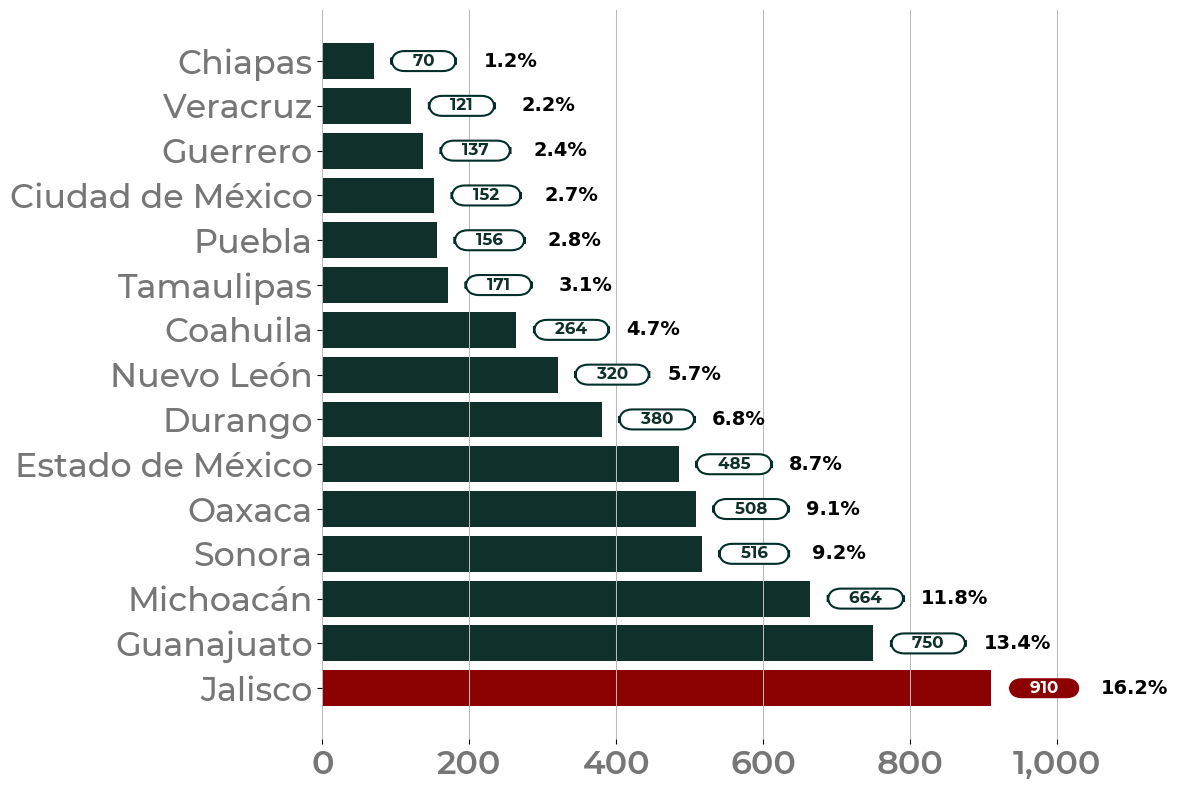

<Figure size 640x480 with 0 Axes>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager
from pathlib import Path
from statistics import mode
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as mticker

def barras_personalizadas(victimas_long, orientacion='horizontal', mostrar_capsula=True, mostrar_porcentaje=True, font = 'Montserrat', destacar_maximo=True):
        
    font_config = {
        'family': 'Montserrat',
        'titulo': {'size': 36, 'weight': 'medium', 'color': '#000000'},
        'eje_y': {'size': 18, 'weight': 'medium', 'color': '#000000'},
        'eje_x': {'size': 18, 'weight': 'medium', 'color': '#000000'},
        'etiquetas_eje_y': {'size': 24, 'weight': 'medium', 'color': '#767676'},
        'etiquetas_eje_x': {'size': 24, 'weight': 'semibold', 'color': '#767676'},
        'capsula_valor': {'size': 12, 'weight': 'bold', 'color': '#10302C'},
        'capsula_max': {'size': 32, 'weight': 'bold', 'color': 'white'},
        'porcentaje': {'size': 14, 'weight': 'bold', 'color': '#000000'}, #se puede camiar el color
    }

    plt.rcParams['svg.fonttype'] = 'none'
    font_dirs = [Path("../0_fonts")]
    font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
    for font_file in font_files:
        font_manager.fontManager.addfont(font_file)

    sorted_df = victimas_long.sort_values(by='Numero de Víctimas', ascending=False)
    entidades = sorted_df['Entidad Federativa'].tolist()
    if np.issubdtype(sorted_df['Entidad Federativa'].dtype, np.datetime64):
        entidades = [x.strftime('%b %Y') for x in sorted_df['Entidad Federativa']]
    entidades = [str(e) for e in entidades]
    valores = sorted_df['Numero de Víctimas'].tolist()
    total = sum(valores)
    max_valor = max(valores)
    y_positions = np.arange(len(entidades))

    if orientacion == 'horizontal':
        fig, ax = plt.subplots(figsize=(12, 8))
        ax.set_facecolor('white')

        for y, entidad, valor in zip(y_positions, entidades, valores):
            if destacar_maximo and valor == max_valor:
                color = '#8B0000'
                text_color = font_config['capsula_max']['color']
                bbox_color = '#8B0000'
                edge_col = 'none'
                lw = 0
            else:
                color = '#10302C'
                text_color = font_config['capsula_valor']['color']
                bbox_color = 'white'
                edge_col = '#002F2A'
                lw = 1.5

            ax.barh(y, valor, color=color, height=0.8)

            if mostrar_capsula:
                texto_capsula = f"    {int(valor):,}    "
                ax.text(valor + max_valor * 0.03, y, texto_capsula,
                        bbox=dict(boxstyle="round,pad=0.15,rounding_size=0.8", facecolor=bbox_color,
                                  edgecolor=edge_col, linewidth=lw),
                        ha='left', va='center',
                        fontsize=font_config['capsula_valor']['size'],
                        fontfamily=font_config['family'],
                        fontweight=font_config['capsula_valor']['weight'],
                        color=text_color)

            if mostrar_porcentaje:
                porcentaje = round((valor / total) * 100, 1)
                ax.text(valor + 150, y, f"{porcentaje}%", va='center', ha='left',
                        fontsize=font_config['porcentaje']['size'],
                        color=font_config['porcentaje']['color'],
                        fontweight=font_config['porcentaje']['weight'])

        ax.set_yticks(y_positions)
        ax.set_yticklabels(entidades, fontsize=10)
        ax.invert_yaxis()
    else:
        fig, ax = plt.subplots(figsize=(14, 8))
        x_positions = np.arange(len(entidades))
        ax.set_facecolor('white')

        for x, entidad, valor in zip(x_positions, entidades, valores):
            if destacar_maximo and valor == max_valor:
                color = '#8B0000'
                text_color = font_config['capsula_max']['color']
                bbox_color = '#8B0000'
                edge_col = 'none'
                lw = 0
            else:
                color = '#10302C'
                text_color = font_config['capsula_valor']['color']
                bbox_color = 'white'
                edge_col = '#002F2A'
                lw = 1.5

            ax.bar(x, valor, color=color, width=0.8)

            if mostrar_capsula:
                texto_capsula = f"    {int(valor):,}    "
                ax.text(x, valor + max_valor * 0.03, texto_capsula,
                    bbox=dict(boxstyle="round,pad=0.15,rounding_size=0.8", facecolor=bbox_color,
                            edgecolor=edge_col, linewidth=lw),
                    ha='center', va='center',  # <-- Cambia 'left' por 'center'
                    fontsize=font_config['capsula_valor']['size'],
                    fontfamily=font_config['family'],
                    fontweight=font_config['capsula_valor']['weight'],
                    color=text_color)

            if mostrar_porcentaje:
                porcentaje = round((valor / total) * 100, 1)
                ax.text(x, valor + 60, f"{porcentaje}%", ha='center', va='bottom',
                        fontsize=font_config['porcentaje']['size'],
                        color=font_config['porcentaje']['color'],
                        fontweight=font_config['porcentaje']['weight'])

    # Configurar ejes y etiquetas
    if orientacion == 'horizontal':
        ax.set_yticks(y_positions)
        ax.set_yticklabels(entidades,
                           fontsize=font_config['etiquetas_eje_y']['size'],
                           fontweight=font_config['etiquetas_eje_y']['weight'],
                           fontfamily=font_config['family'],
                           color=font_config['etiquetas_eje_y']['color'])
        ax.invert_yaxis()
        ax.set_xlim(0, 1.1 * max_valor)
        ax.xaxis.set_major_locator(mticker.MaxNLocator(nbins='auto', steps=[1, 2, 5, 10]))
        ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x):,}"))
        plt.setp(ax.get_xticklabels(),
                 fontsize=font_config['etiquetas_eje_x']['size'],
                 fontweight=font_config['etiquetas_eje_x']['weight'],
                 fontfamily=font_config['family'],
                 color=font_config['etiquetas_eje_x']['color'])
        ax.grid(visible=True, axis='x', color='#B9B9B9', linewidth=0.75, linestyle='-')
    else:
        ax.set_xticks(x_positions)
        ax.set_xticklabels(entidades,
                           fontsize=font_config['etiquetas_eje_x']['size'],
                           fontweight=font_config['etiquetas_eje_x']['weight'],
                           fontfamily=font_config['family'],
                           color=font_config['etiquetas_eje_x']['color'],
                           rotation=45, ha='right')
        ax.set_ylim(0, 1.1 * max_valor)
        ax.yaxis.set_major_locator(mticker.MaxNLocator(nbins='auto', steps=[1, 2, 5, 10]))
        ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x):,}"))
        plt.setp(ax.get_yticklabels(),
                 fontsize=font_config['etiquetas_eje_y']['size'],
                 fontweight=font_config['etiquetas_eje_y']['weight'],
                 fontfamily=font_config['family'],
                 color=font_config['etiquetas_eje_y']['color'])
        ax.grid(visible=False, axis='y', color='#B9B9B9', linewidth=0.75, linestyle='-')

    # Quitar bordes
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    plt.tight_layout()
    plt.show()

# Ejemplo con cápsulas y porcentaje desactivados
barras_personalizadas(victimas_long, orientacion='horizontal', mostrar_capsula=True, mostrar_porcentaje=True, destacar_maximo=True)

dpi = 300  # or any desired value
plt.savefig("barras.svg", format="svg", bbox_inches='tight', dpi=dpi)
